### **Apollo Web Scraper Notebook**
*Data was scraped with permission from the site owner.*

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import json
import pandas as pd

In [3]:
def apollo_scraper_full(url, spec, realm_str, return50 = False, full_data = False):
    """Function to scrape dps table from apollo-wow and outputs pd_dataframe.
    Inputs: url as string, talent spec as string (e.g. 'Assassination'), 
    realm as string (e.g. 'Apollo2'), return50 as bool (default 'True' returns only top 50 values)
    Outputs: dataframe with all variables from apollo table
    """
    
    #improve print for every iteration!!
    
    #pretending to be a browser
    r = Request(url, headers = {'User-Agent': 'Mozilla/5.0'})
    
    #loading page data into soup object
    page = urlopen(r)
    html = page.read().decode("utf-8")
    soup = BeautifulSoup(html, "html.parser")
    
    #convert soup object to string list, containing rel info
    html_scrape = soup.find_all('script')
    get_ind = 0
    for i in range(len(html_scrape)):
        if spec in str(html_scrape[i]):
            #print('It happened')
            get_ind = i
            
    if get_ind == 0:
        return print('INDEXING ERROR')
    
    html_scrape_ind = html_scrape[get_ind]
    html_string = str(html_scrape_ind)
    div_list = html_string.split('\n')
    
    #extracting the sublist with the relevant table here:    
    for i in div_list:
        if spec in i:
            rel_data = i
            break

    #cutting off and adding some string chars to get it into json format
    rel_data_for_json = rel_data[rel_data.index('data: ') + 6:rel_data.index("});")]
    rel_data_for_json = '{ "data": ' + rel_data_for_json + '}'
    
    #loading json data as dictionary 
    data = json.loads(rel_data_for_json)
    data = data['data']
    
    #converting to dataframe
    df = pd.DataFrame.from_dict(data)
    
    if full_data == False:
        #'cuts' off wrong realm and resetting indices
        df = df[df.realm==realm_str]
        df.reset_index(inplace = True, drop = True)
    
        #turning string dps values to float
        df['dps'] = df['dps'].astype(float)
        df['length'] = df['length'].astype(float)
        df['avg_item_lvl'] = df['avg_item_lvl'].astype(float)

        print('No of values: ' + str(len(df)))
        return df
    else:
        #turning string dps values to float
        df['dps'] = df['dps'].astype(float)
        df['length'] = df['length'].astype(float)
        df['avg_item_lvl'] = df['avg_item_lvl'].astype(float)

        print('No of values: ' + str(len(df)))
        return df

In [2]:
def apollo_scraper_full_v2(url, spec, realm_str, class_list, return50 = False, full_data = False):
    """Function to scrape dps table from apollo-wow and outputs pd_dataframe.
    Inputs: url as string, talent spec as string (e.g. 'Assassination'), 
    realm as string (e.g. 'Apollo2'), return50 as bool (default 'True' returns only top 50 values)
    Outputs: dataframe with all variables from apollo table
    """
    
    #improve print for every iteration!!
    
    #pretending to be a browser
    r = Request(url, headers = {'User-Agent': 'Mozilla/5.0'})
    
    #loading page data into soup object
    page = urlopen(r)
    html = page.read().decode("utf-8")
    soup = BeautifulSoup(html, "html.parser")
    
    #convert soup object to string list, containing rel info
    html_scrape = soup.find_all('script')
    get_ind = 0
    for i in range(len(html_scrape)):
        if spec in str(html_scrape[i]):
            get_ind = i
            
    if get_ind == 0:
        return print('INDEXING ERROR')
    
    html_scrape_ind = html_scrape[get_ind]
    html_string = str(html_scrape_ind)
    div_list = html_string.split('\n')
    
    #extracting the sublist with the relevant table here:    
    if spec == class_list[0]:
        rel_data = div_list[2]
    elif spec == class_list[1]:
        rel_data = div_list[3]
    elif spec == class_list[2]:
        rel_data = div_list[4]

    #cutting off and adding some string chars to get it into json format
    rel_data_for_json = rel_data[rel_data.index('data: ') + 6:rel_data.index("});")]
    rel_data_for_json = '{ "data": ' + rel_data_for_json + '}'
    
    #loading json data as dictionary 
    data = json.loads(rel_data_for_json)
    data = data['data']
    
    #converting to dataframe
    df = pd.DataFrame.from_dict(data)
    
    if df.empty == True:
        print('No entries for ' + spec + ' found!!', end = '')
        return df
    
    else: 
        if full_data == False:
            #'cuts' off wrong realm and resetting indices
            df = df[df.realm==realm_str]
            df.reset_index(inplace = True, drop = True)
    
            #turning string dps values to float
            df['dps'] = df['dps'].astype(float)
            df['length'] = df['length'].astype(float)
            df['avg_item_lvl'] = df['avg_item_lvl'].astype(float)

            print('Entries for ' + spec + ': ' + str(len(df)), end = '')
            return df
        else:
            #turning string dps values to float
            df['dps'] = df['dps'].astype(float)
            df['length'] = df['length'].astype(float)
            df['avg_item_lvl'] = df['avg_item_lvl'].astype(float)

            print('Entries for ' + spec + ': ' + str(len(df)), end = '')
            return df

In [12]:
#trying it out for assa on apollo2 majordomo HC on 28.05.21:
url       = 'https://cata-twinhead.twinstar.cz/?boss-kill-npc-top=53858&class=4'
spec      = 'Assassination'
realm_str = 'Apollo2'
majohc_assa = apollo_scraper_full(url, spec, realm_str)

#save it to pickle 
majohc_assa.to_pickle("majordomo_hc_assa_rog_280521.pkl")

No of values: 53


In [14]:
read = pd.read_pickle("majordomo_hc_assa_rog_280521.pkl")
print(read)

           dps       id         name class realm_id    realm    length  \
0   54743.7893  1671602   Melahandra     4       14  Apollo2  516813.0   
1   54469.4857  1744456       Bacari     4       14  Apollo2  529030.0   
2   53527.6501  1716882        Nokee     4       14  Apollo2  510577.0   
3   52564.1600  1696239   Karatekarl     4       14  Apollo2  485692.0   
4   52434.5595  1665404         Ymer     4       14  Apollo2  517699.0   
5   51845.9031  1657833      Seraphs     4       14  Apollo2  504410.0   
6   51767.9280  1734803        Benyf     4       14  Apollo2  440665.0   
7   51622.0574  1744456  Stabbytorch     4       14  Apollo2  529030.0   
8   51094.7782  1703937        Ymere     4       14  Apollo2  571566.0   
9   51018.7741  1605634        Koyaa     4       14  Apollo2  529027.0   
10  50935.7610  1618640   Vapenation     4       14  Apollo2  545852.0   
11  50758.7776  1647923         Noid     4       14  Apollo2  515234.0   
12  50724.8906  1728822         Viid  

In [3]:
# url strings 
#string start:
start_url = 'https://cata-twinhead.twinstar.cz/?'

#classes
Warrior = '&class=1'
War1 = 'Arms'
War2 = 'Fury'
War3 = 'Protection'
Warlist = [War1, War2, War3]

Paladin = '&class=2'
Pal1 = 'Holy'
Pal2 = 'Protection'
Pal3 = 'Retribution'
Pallist = [Pal1, Pal2, Pal3]

Hunter = '&class=3'
Hunt1 = 'Beast Mastery'
Hunt2 = 'Marksmanship'
Hunt3 = 'Survival'
Huntlist = [Hunt1, Hunt2, Hunt3]

Rogue = '&class=4'
Rog1 = 'Assassination'
Rog2 = 'Combat'
Rog3 = 'Subtlety'
Roglist = [Rog1, Rog2, Rog3]

Priest = '&class=5'
Pri1 = 'Discipline'
Pri2 = 'Holy'
Pri3 = 'Shadow'
Prilist = [Pri1, Pri2, Pri3]

Death_Knight = '&class=6'
Dk1 = 'Blood'
Dk2 = 'Frost'
Dk3 = 'Unholy'
Dklist = [Dk1, Dk2, Dk3]

Shaman = '&class=7'
Sham1 = 'Elemental'
Sham2 = 'Enhancement'
Sham3 = 'Restoration'
Shamlist = [Sham1, Sham2, Sham3]

Mage = '&class=8'
Mag1 = 'Arcane'
Mag2 = 'Fire'
Mag3 = 'Frost'
Maglist = [Mag1, Mag2, Mag3]

Warlock = '&class=9'
Warl1 = 'Affliction'
Warl2 = 'Demonology'
Warl3 = 'Destruction'
Warllist = [Warl1, Warl2, Warl3]

Druid = '&class=11'
Dru1 = 'Balance'
Dru2 = 'Feral Combat'
Dru3 = 'Restoration'
Drulist = [Dru1, Dru2, Dru3]

class_url_strings = [Warrior, Paladin, Hunter, Rogue, Priest, Death_Knight, Shaman, Mage, Warlock, Druid]

#shannox overall dps/hps tables:
shannox_10_nm = 'npc=53691'
shannox_10_hc = 'npc=54079'
shannox_25_nm = 'npc=53979'
shannox_25_hc = 'npc=54080'
#on this page best 100 dps / hps data should be accessible
shannox_all_list = [shannox_10_nm, shannox_10_hc, shannox_25_nm, shannox_25_hc]

#shannox dps-spec-specific dps tables:
shannox_10_nm_top = 'boss-kill-npc-top=53691'
shannox_10_hc_top = 'boss-kill-npc-top=54079'
shannox_25_nm_top = 'boss-kill-npc-top=53979'
shannox_25_hc_top = 'boss-kill-npc-top=54080'
shannox_top_list = [shannox_10_nm_top, shannox_10_hc_top, shannox_25_nm_top, shannox_25_hc_top]

#Lord Ryolith overall dps/hps tables:
ryo_10_nm = 'npc=52558'
ryo_10_hc = 'npc=52560'
ryo_25_nm = 'npc=52559'
ryo_25_hc = 'npc=52561'
#on this page best 100 dps / hps data should be accessible
ryo_all_list = [ryo_10_nm, ryo_10_hc, ryo_25_nm, ryo_25_hc]

#Lord Ryolith dps-spec-specific dps tables:
ryo_10_nm_top = 'boss-kill-npc-top=52558'
ryo_10_hc_top = 'boss-kill-npc-top=52560'
ryo_25_nm_top = 'boss-kill-npc-top=52559'
ryo_25_hc_top = 'boss-kill-npc-top=52561'
ryo_top_list = [ryo_10_nm_top, ryo_10_hc_top, ryo_25_nm_top, ryo_25_hc_top]

#Beth'tilac overall dps/hps tables:
beth_10_nm = 'npc=52498'
beth_10_hc = 'npc=53577'
beth_25_nm = 'npc=53576'
beth_25_hc = 'npc=53578'
#on this page best 100 dps / hps data should be accessible
beth_all_list = [beth_10_nm, beth_10_hc, beth_25_nm, beth_25_hc]

#Beth'tilac dps-spec-specific dps tables:
beth_10_nm_top = 'boss-kill-npc-top=52498'
beth_10_hc_top = 'boss-kill-npc-top=53577'
beth_25_nm_top = 'boss-kill-npc-top=53576'
beth_25_hc_top = 'boss-kill-npc-top=53578'
beth_top_list = [beth_10_nm_top, beth_10_hc_top, beth_25_nm_top, beth_25_hc_top]

#Alysrazor overall dps/hps tables:
alys_10_nm = 'npc=52530'
alys_10_hc = 'npc=54045'
alys_25_nm = 'npc=54044'
alys_25_hc = 'npc=54046'
#on this page best 100 dps / hps data should be accessible
alys_all_list = [alys_10_nm, alys_10_hc, alys_25_nm, alys_25_hc]

#Alysrazor dps-spec-specific dps tables:
alys_10_nm_top = 'boss-kill-npc-top=52530'
alys_10_hc_top = 'boss-kill-npc-top=54045'
alys_25_nm_top = 'boss-kill-npc-top=54044'
alys_25_hc_top = 'boss-kill-npc-top=54046'
alys_top_list = [alys_10_nm_top, alys_10_hc_top, alys_25_nm_top, alys_25_hc_top]

#Bale overall dps/hps tables:
bale_10_nm = 'npc=53494'
bale_10_hc = 'npc=53588'
bale_25_nm = 'npc=53587'
bale_25_hc = 'npc=53589'
#on this page best 100 dps / hps data should be accessible
bale_all_list = [bale_10_nm, bale_10_hc, bale_25_nm, bale_25_hc]

#Bale dps-spec-specific dps tables:
bale_10_nm_top = 'boss-kill-npc-top=53494'
bale_10_hc_top = 'boss-kill-npc-top=53588'
bale_25_nm_top = 'boss-kill-npc-top=53587'
bale_25_hc_top = 'boss-kill-npc-top=53589'
bale_top_list = [bale_10_nm_top, bale_10_hc_top, bale_25_nm_top, bale_25_hc_top]

#Majordomo overall dps/hps tables:
majo_10_nm = 'npc=52571'
majo_10_hc = 'npc=53857'
majo_25_nm = 'npc=53856'
majo_25_hc = 'npc=53858'
#on this page best 100 dps / hps data should be accessible
majo_all_list = [majo_10_nm, majo_10_hc, majo_25_nm, majo_25_hc]

#Majordomo dps-spec-specific dps tables:
majo_10_nm_top = 'boss-kill-npc-top=52571'
majo_10_hc_top = 'boss-kill-npc-top=53857'
majo_25_nm_top = 'boss-kill-npc-top=53856'
majo_25_hc_top = 'boss-kill-npc-top=53858'
majo_top_list = [majo_10_nm_top, majo_10_hc_top, majo_25_nm_top, majo_25_hc_top]

#Rag overall dps/hps tables:
rag_10_nm = 'npc=52409'
rag_10_hc = 'npc=53798'
rag_25_nm = 'npc=53797'
rag_25_hc = 'npc=53799'
#on this page best 100 dps / hps data should be accessible
rag_all_list = [rag_10_nm, rag_10_hc, rag_25_nm, rag_25_hc]

#Rag dps-spec-specific dps tables:
rag_10_nm_top = 'boss-kill-npc-top=52409'
rag_10_hc_top = 'boss-kill-npc-top=53798'
rag_25_nm_top = 'boss-kill-npc-top=53797'
rag_25_hc_top = 'boss-kill-npc-top=53799'
rag_top_list = [rag_10_nm_top, rag_10_hc_top, rag_25_nm_top, rag_25_hc_top]

#### Boss data:

In [27]:
#Warrior: Arms shannox dps
realm_str = 'Apollo2'

spec = 'Arms'
url = start_url + shannox_10_nm_top + Warrior
today = '_28052021'
pickle = '.pkl'
shannox_10nm_warrior_arms = apollo_scraper_full(url, spec, realm_str)
shannox_10nm_warrior_arms.to_pickle("shannox_10nm_warrior_arms" + today + pickle)


No of values: 200


In [24]:
read = pd.read_pickle("shannox_10nm_warrior_arms_28052021.pkl")
print(read)

            dps       id         name class realm_id    realm    length  \
0    38093.1240  1716667         Meey     1        9   Apollo  176775.0   
1    36676.4534  1650463       Rejzak     1        9   Apollo  181878.0   
2    32250.9425  1669956   Leftsoftes     1        9   Apollo  266037.0   
3    32054.5019  1648556      Sacrata     1        9   Apollo  230157.0   
4    28112.8685  1570402     Thericco     1        9   Apollo  229825.0   
..          ...      ...          ...   ...      ...      ...       ...   
200  14340.3083  1597789        Aphox     1       14  Apollo2  443060.0   
201  13442.1056  1596295    Extazsion     1       14  Apollo2  482534.0   
202  13242.2213  1617531         Dogx     1       14  Apollo2  523418.0   
203  11674.0006  1732986  Tartinefire     1       14  Apollo2  428418.0   
204    937.7518  1664197     Hideakii     1       14  Apollo2  295671.0   

     avg_item_lvl talent_spec                  guild  position  
0         396.588         815     

In [25]:
realm_str = 'Apollo2'
#Warrior: Arms shannox dps
spec = 'Arms'
url = 'https://cata-twinhead.twinstar.cz/?boss-kill-npc-top=53691&class=1#class-6-arms'
today = '_28052021'
pickle = '.pkl'
shannox_10nm_warrior_arms = apollo_scraper_full(url, spec, realm_str)
print(shannox_10nm_warrior_arms)

No of values: 25
           dps       id         name class realm_id    realm    length  \
0   24733.2240  1635390       Arodir     1       14  Apollo2  277941.0   
1   20919.4951  1620420    Sleepster     1       14  Apollo2  357680.0   
2   19703.4085  1674757       Kazgor     1       14  Apollo2  355199.0   
3   19506.5922  1620577       Bargox     1       14  Apollo2  323335.0   
4   19100.3383  1649050   Leftsoftes     1       14  Apollo2  321941.0   
5   18722.2762  1604224      Chuskas     1       14  Apollo2  522267.0   
6   18490.7911  1649764         Axes     1       14  Apollo2  378980.0   
7   18458.2414  1645204      Zapkiel     1       14  Apollo2  401354.0   
8   18286.6173  1621727   Eliminujem     1       14  Apollo2  337136.0   
9   17085.4346  1698934          Dhr     1       14  Apollo2  397614.0   
10  16971.8685  1744392       Roytwo     1       14  Apollo2  387786.0   
11  16910.5705  1697506        Aizee     1       14  Apollo2  345188.0   
12  16745.4160  17115

In [31]:
#Warriors
today = '_28052021'
pickle = '.pkl'        
endstring = today + pickle
realm_str = 'Apollo2'
bossname = 'Shannox'
mode_list = ['_10nm', '_10hc', '_25nm', '_25hc']

for index, boss in enumerate(shannox_top_list):
    for war in Warlist:
        spec = war
        url = start_url + boss + Warrior
        name = apollo_scraper_full(url, spec, realm_str)
        #saving
        name.to_pickle(bossname + mode_list[index] + '_' + spec +  endstring)
        
print('finished.')


No of values: 200
No of values: 200
No of values: 97
No of values: 200
No of values: 200
No of values: 58
No of values: 184
No of values: 7
No of values: 13
No of values: 195
No of values: 6
No of values: 12


In [33]:
#Warriors
today = '_28052021'
pickle = '.pkl'        
endstring = today + pickle
realm_str = 'Apollo2'
bossname = 'Shannox'
mode_list = ['_10nm', '_10hc', '_25nm', '_25hc']

for index, boss in enumerate(shannox_top_list):
    for war in Warlist:
        spec = war
        url = start_url + boss + Warrior
        name = apollo_scraper_full(url, spec, realm_str)
        #saving
        name.to_pickle(bossname + mode_list[index] + '_War_' + spec +  endstring)
        
print('finished.')

No of values: 200
No of values: 200
No of values: 97
No of values: 200
No of values: 200
No of values: 58
No of values: 184
No of values: 7
No of values: 13
No of values: 195
No of values: 6
No of values: 12
finished.


In [35]:
#Paladins
#change these: bosslist (1st loop), Classlist (2nd loop), Class in URL, bossname (str), today (str), abbrev
today = '_28052021'
pickle = '.pkl'        
endstring = today + pickle
realm_str = 'Apollo2'
bossname = 'Shannox'
mode_list = ['_10nm', '_10hc', '_25nm', '_25hc']

abbrev = '_Pal_'

for index, boss in enumerate(shannox_top_list):
    for talent_spec in Pallist:
        spec = talent_spec
        url = start_url + boss + Paladin
        name = apollo_scraper_full(url, spec, realm_str)
        #saving
        name.to_pickle(bossname + mode_list[index] + abbrev + spec +  endstring)
        
print('finished.')

No of values: 200
No of values: 200
No of values: 200
No of values: 200
No of values: 184
No of values: 200
No of values: 136
No of values: 29
No of values: 164
No of values: 154
No of values: 20
No of values: 161
finished.


In [36]:
#Hunter
#change these: abbrev, bosslist (1st loop), Classlist (2nd loop), Class in URL, bossname (str), today (str)
today = '_28052021'
pickle = '.pkl'        
endstring = today + pickle
realm_str = 'Apollo2'
bossname = 'Shannox'
mode_list = ['_10nm', '_10hc', '_25nm', '_25hc']

abbrev = '_Hunt_'

for index, boss in enumerate(shannox_top_list):
    for talent_spec in Huntlist:
        spec = talent_spec
        url = start_url + boss + Hunter
        name = apollo_scraper_full(url, spec, realm_str)
        #saving
        name.to_pickle(bossname + mode_list[index] + abbrev + spec +  endstring)
        
print('finished.')

No of values: 26
No of values: 200
No of values: 200
No of values: 11
No of values: 200
No of values: 200
No of values: 6
No of values: 30
No of values: 200
No of values: 7
No of values: 30
No of values: 191
finished.


In [7]:
#to do: bosslist of lists

#Don't forget to change these: abbrev, bosslist (1st loop), Classlist (2nd loop), Class in URL, bossname (str), today (str)
today = '_30052021'
pickle = '.pkl'        
endstring = today + pickle
realm_str = 'Apollo2'
bossname = 'Shannox'
mode_list = ['_10nm', '_10hc', '_25nm', '_25hc']

#from 0 to 9
abbrev = ['_War_', '_Pal_', '_Hunt_', '_Rog_', '_Pri_', '_Dk_', '_Sham_', '_Mag_', '_Warl_', '_Dru_']

#also from 0 to 9 (same number as above obviously!)
list_of_classlists = [Warlist, Pallist, Huntlist, Roglist, Prilist, Dklist, Shamlist, Maglist, Warllist, Drulist]

#current abbr and sublist and class-specific url list:
abbr = abbrev[3]
curr_class = list_of_classlists[3]
class_url = class_url_strings[3]

for index, boss in enumerate(shannox_top_list):
    for talent_spec in curr_class:
        url = start_url + boss + class_url
        name = apollo_scraper_full(url, talent_spec, realm_str)
        #saving
        name.to_pickle(bossname + mode_list[index] + abbr + talent_spec +  endstring)
        
print(bossname + ' ' + abbr + ' finished.')

No of values: 200
No of values: 200
No of values: 18
No of values: 200
No of values: 183
No of values: 26
No of values: 90
No of values: 72
No of values: 9
No of values: 130
No of values: 57
No of values: 13
Shannox _Rog_ finished.


In [18]:
#to do: bosslist of lists

#change these: abbrev, bosslist (1st loop), Classlist (2nd loop), Class in URL, bossname (str), today (str)
today = '_30052021'
pickle = '.pkl'        
endstring = today + pickle
realm_str = 'Apollo2'
bossname = 'Shannox'
mode_list = ['_10nm', '_10hc', '_25nm', '_25hc']

#from 0 to 9
abbrev = ['_War_', '_Pal_', '_Hunt_', '_Rog_', '_Pri_', '_Dk_', '_Sham_', '_Mag_', '_Warl_', '_Dru_']

#also from 0 to 9 (use same number as above obviously!)
list_of_classlists = [Warlist, Pallist, Huntlist, Roglist, Prilist, Dklist, Shamlist, Maglist, Warllist, Drulist]


for count in range(10):
    
    #current abbr and sublist and class-specific url list:
    abbr = abbrev[count]
    curr_class = list_of_classlists[count]
    class_url = class_url_strings[count]

    for index, boss in enumerate(shannox_top_list):
        for talent_spec in curr_class:
            url = start_url + boss + class_url
            name = apollo_scraper_full_v2(url, talent_spec, realm_str, curr_class)
            #saving
            name.to_pickle(bossname + mode_list[index] + abbr + talent_spec +  endstring)
            print('.. for: ' + modelist[index])
            
    print(bossname + ' ' + abbr + ' finished.')

No of entries for Arms: 200
No of entries for Fury: 25
No of entries for Protection: 97
No of entries for Arms: 200
No of entries for Fury: 22
No of entries for Protection: 58
No of entries for Arms: 184
No of entries for Fury: 7
No of entries for Protection: 13
No of entries for Arms: 195
No of entries for Fury: 6
No of entries for Protection: 12
Shannox _War_ finished.
No of entries for Holy: 200
No of entries for Protection: 200
No of entries for Retribution: 200
No of entries for Holy: 200
No of entries for Protection: 184
No of entries for Retribution: 200
No of entries for Holy: 136
No of entries for Protection: 29
No of entries for Retribution: 164
No of entries for Holy: 154
No of entries for Protection: 20
No of entries for Retribution: 161
Shannox _Pal_ finished.
No of entries for Beast Mastery: 26
No of entries for Marksmanship: 200
No of entries for Survival: 200
No of entries for Beast Mastery: 11
No of entries for Marksmanship: 200
No of entries for Survival: 200
No of en

In [21]:
read = pd.read_pickle("Lord Ryolith_10hc_Mag_Frost_30052021.pkl")
print(read)

Empty DataFrame
Columns: [dps, id, name, class, realm_id, realm, length, avg_item_lvl, talent_spec, guild, position]
Index: []


In [26]:
#Lord Ryolith
#change these: abbrev, bosslist (1st loop), Classlist (2nd loop), Class in URL, bossname (str), today (str)
today = '_31052021'
pickle = '.pkl'        
endstring = today + pickle
realm_str = 'Apollo2'
bossname = "Lord Ryolith"
mode_list = ['_10nm', '_10hc', '_25nm', '_25hc']

#from 0 to 9
abbrev = ['_War_', '_Pal_', '_Hunt_', '_Rog_', '_Pri_', '_Dk_', '_Sham_', '_Mag_', '_Warl_', '_Dru_']

#also from 0 to 9 (use same number as above obviously!)
list_of_classlists = [Warlist, Pallist, Huntlist, Roglist, Prilist, Dklist, Shamlist, Maglist, Warllist, Drulist]


for count in range(6, 10):
    
    #current abbr and sublist and class-specific url list:
    abbr = abbrev[count]
    curr_class = list_of_classlists[count]
    class_url = class_url_strings[count]

    for index, boss in enumerate(ryo_top_list):
        for talent_spec in curr_class:
            url = start_url + boss + class_url
            name = apollo_scraper_full_v2(url, talent_spec, realm_str, curr_class)
            print(' .. for: ' + mode_list[index])
            
            if name.empty == False:
                #saving
                name.to_pickle(bossname + mode_list[index] + abbr + talent_spec +  endstring)
            else:
                print('No file created for empty df object.')
    print(bossname + ' ' + abbr[1:-1] + 'data finished downloading.')

Entries for Elemental: 200 .. for: _10nm
Entries for Enhancement: 189 .. for: _10nm
Entries for Restoration: 200 .. for: _10nm
Entries for Elemental: 192 .. for: _10hc
Entries for Enhancement: 18 .. for: _10hc
Entries for Restoration: 26 .. for: _10hc
Entries for Elemental: 200 .. for: _25nm
Entries for Enhancement: 69 .. for: _25nm
Entries for Restoration: 171 .. for: _25nm
Entries for Elemental: 37 .. for: _25hc
Entries for Enhancement: 3 .. for: _25hc
Entries for Restoration: 14 .. for: _25hc
Lord Ryolith _Sham_ finished.
Entries for Arcane: 52 .. for: _10nm
Entries for Fire: 200 .. for: _10nm
Entries for Frost: 12 .. for: _10nm
Entries for Arcane: 1 .. for: _10hc
Entries for Fire: 163 .. for: _10hc
Entries for Frost: 0 .. for: _10hc
No file created for empty df object.
Entries for Arcane: 16 .. for: _25nm
Entries for Fire: 200 .. for: _25nm
Entries for Frost: 3 .. for: _25nm
Entries for Arcane: 1 .. for: _25hc
Entries for Fire: 34 .. for: _25hc
No entries for Frostfound!! .. for: _

In [30]:
#Beth'tilac
#change: today (str), bossname (str), bosslist (1st loop iterator)
today = '_31052021'
pickle = '.pkl'        
endstring = today + pickle
realm_str = 'Apollo2'
bossname = "Bethtilac"
mode_list = ['_10nm', '_10hc', '_25nm', '_25hc']

#from 0 to 9
abbrev = ['_War_', '_Pal_', '_Hunt_', '_Rog_', '_Pri_', '_Dk_', '_Sham_', '_Mag_', '_Warl_', '_Dru_']

#also from 0 to 9 (use same number as above obviously!)
list_of_classlists = [Warlist, Pallist, Huntlist, Roglist, Prilist, Dklist, Shamlist, Maglist, Warllist, Drulist]


for count in range(10):
    
    #current abbr and sublist and class-specific url list:
    abbr = abbrev[count]
    curr_class = list_of_classlists[count]
    class_url = class_url_strings[count]

    for index, boss in enumerate(beth_top_list):
        for talent_spec in curr_class:
            url = start_url + boss + class_url
            name = apollo_scraper_full_v2(url, talent_spec, realm_str, curr_class)
            print(' .. for ' + mode_list[index][1::])
            
            if name.empty == False:
                #saving
                name.to_pickle(bossname + mode_list[index] + abbr + talent_spec +  endstring)
            else:
                print('No file created for empty df object.')
    print(bossname + ' ' + abbr[1:-1] + '-data finished downloading.')

Entries for Arms: 200 .. for: 10nm
Entries for Fury: 47 .. for: 10nm
Entries for Protection: 172 .. for: 10nm
Entries for Arms: 153 .. for: 10hc
Entries for Fury: 2 .. for: 10hc
Entries for Protection: 6 .. for: 10hc
Entries for Arms: 200 .. for: 25nm
Entries for Fury: 19 .. for: 25nm
Entries for Protection: 21 .. for: 25nm
Entries for Arms: 50 .. for: 25hc
Entries for Fury: 1 .. for: 25hc
Entries for Protection: 2 .. for: 25hc
Bethtilac Wardata finished downloading.
Entries for Holy: 200 .. for: 10nm
Entries for Protection: 200 .. for: 10nm
Entries for Retribution: 200 .. for: 10nm
Entries for Holy: 153 .. for: 10hc
Entries for Protection: 25 .. for: 10hc
Entries for Retribution: 174 .. for: 10hc
Entries for Holy: 200 .. for: 25nm
Entries for Protection: 48 .. for: 25nm
Entries for Retribution: 200 .. for: 25nm
Entries for Holy: 41 .. for: 25hc
Entries for Protection: 2 .. for: 25hc
Entries for Retribution: 29 .. for: 25hc
Bethtilac Paldata finished downloading.
Entries for Beast Mast

In [4]:
#Alysrazor
#change: Title, today (str), bossname (str), bosslist (1st loop iterator) 
today = '_01062021'
pickle = '.pkl'        
endstring = today + pickle
realm_str = 'Apollo2'
bossname = "Alysrazor"
mode_list = ['_10nm', '_10hc', '_25nm', '_25hc']

#from 0 to 9
abbrev = ['_War_', '_Pal_', '_Hunt_', '_Rog_', '_Pri_', '_Dk_', '_Sham_', '_Mag_', '_Warl_', '_Dru_']

#also from 0 to 9 (use same number as above obviously!)
list_of_classlists = [Warlist, Pallist, Huntlist, Roglist, Prilist, Dklist, Shamlist, Maglist, Warllist, Drulist]


for count in range(10):
    
    #current abbr and sublist and class-specific url list:
    abbr = abbrev[count]
    curr_class = list_of_classlists[count]
    class_url = class_url_strings[count]

    for index, boss in enumerate(alys_top_list):
        for talent_spec in curr_class:
            url = start_url + boss + class_url
            name = apollo_scraper_full_v2(url, talent_spec, realm_str, curr_class)
            print(' - ' + mode_list[index][1::])
            
            if name.empty == False:
                #saving
                name.to_pickle(bossname + mode_list[index] + abbr + talent_spec +  endstring)
            else:
                print('No file created for empty df object.')
    print('------ ' + bossname + ' ' + abbr[1:-1] + '-data finished downloading.' + ' ------')

Entries for Arms: 200 - 10nm
Entries for Fury: 33 - 10nm
Entries for Protection: 110 - 10nm
Entries for Arms: 200 - 10hc
Entries for Fury: 6 - 10hc
Entries for Protection: 15 - 10hc
Entries for Arms: 200 - 25nm
Entries for Fury: 17 - 25nm
Entries for Protection: 17 - 25nm
Entries for Arms: 85 - 25hc
Entries for Fury: 1 - 25hc
Entries for Protection: 4 - 25hc
------ Alysrazor War-data finished downloading. ------
Entries for Holy: 200 - 10nm
Entries for Protection: 200 - 10nm
Entries for Retribution: 200 - 10nm
Entries for Holy: 200 - 10hc
Entries for Protection: 54 - 10hc
Entries for Retribution: 200 - 10hc
Entries for Holy: 200 - 25nm
Entries for Protection: 42 - 25nm
Entries for Retribution: 200 - 25nm
Entries for Holy: 73 - 25hc
Entries for Protection: 8 - 25hc
Entries for Retribution: 56 - 25hc
------ Alysrazor Pal-data finished downloading. ------
Entries for Beast Mastery: 18 - 10nm
Entries for Marksmanship: 112 - 10nm
Entries for Survival: 200 - 10nm
Entries for Beast Mastery: 4

In [34]:
#Baleroc
#change: Title, today (str), bossname (str), bosslist (1st loop iterator)
today = '_31052021'
pickle = '.pkl'        
endstring = today + pickle
realm_str = 'Apollo2'
bossname = "Baleroc"
mode_list = ['_10nm', '_10hc', '_25nm', '_25hc']

#from 0 to 9
abbrev = ['_War_', '_Pal_', '_Hunt_', '_Rog_', '_Pri_', '_Dk_', '_Sham_', '_Mag_', '_Warl_', '_Dru_']

#also from 0 to 9 (use same number as above obviously!)
list_of_classlists = [Warlist, Pallist, Huntlist, Roglist, Prilist, Dklist, Shamlist, Maglist, Warllist, Drulist]


for count in range(10):
    
    #current abbr and sublist and class-specific url list:
    abbr = abbrev[count]
    curr_class = list_of_classlists[count]
    class_url = class_url_strings[count]

    for index, boss in enumerate(bale_top_list):
        for talent_spec in curr_class:
            url = start_url + boss + class_url
            name = apollo_scraper_full_v2(url, talent_spec, realm_str, curr_class)
            print(' for ' + mode_list[index][1::])
            
            if name.empty == False:
                #saving
                name.to_pickle(bossname + mode_list[index] + abbr + talent_spec +  endstring)
            else:
                print('No file created for empty df object.')
    print('------ ' + bossname + ' ' + abbr[1:-1] + '-data finished downloading.' + ' ------')
print('Done.')

Entries for Arms: 200 .. for 10nm
Entries for Fury: 56 .. for 10nm
Entries for Protection: 83 .. for 10nm
Entries for Arms: 176 .. for 10hc
Entries for Fury: 1 .. for 10hc
Entries for Protection: 0 .. for 10hc
No file created for empty df object.
Entries for Arms: 200 .. for 25nm
Entries for Fury: 21 .. for 25nm
Entries for Protection: 14 .. for 25nm
Entries for Arms: 49 .. for 25hc
Entries for Fury: 2 .. for 25hc
Entries for Protection: 0 .. for 25hc
No file created for empty df object.
Baleroc War-data finished downloading.
Entries for Holy: 200 .. for 10nm
Entries for Protection: 200 .. for 10nm
Entries for Retribution: 200 .. for 10nm
Entries for Holy: 165 .. for 10hc
Entries for Protection: 9 .. for 10hc
Entries for Retribution: 190 .. for 10hc
Entries for Holy: 200 .. for 25nm
Entries for Protection: 36 .. for 25nm
Entries for Retribution: 200 .. for 25nm
Entries for Holy: 38 .. for 25hc
Entries for Protection: 1 .. for 25hc
Entries for Retribution: 29 .. for 25hc
Baleroc Pal-dat

In [5]:
#Ragnaros
#change: Title, today (str), bossname (str), bosslist (1st loop iterator)
today = '_01062021'
pickle = '.pkl'        
endstring = today + pickle
realm_str = 'Apollo2'
bossname = "Ragnaros"
mode_list = ['_10nm', '_10hc', '_25nm', '_25hc']

#from 0 to 9
abbrev = ['_War_', '_Pal_', '_Hunt_', '_Rog_', '_Pri_', '_Dk_', '_Sham_', '_Mag_', '_Warl_', '_Dru_']

#also from 0 to 9 (use same number as above obviously!)
list_of_classlists = [Warlist, Pallist, Huntlist, Roglist, Prilist, Dklist, Shamlist, Maglist, Warllist, Drulist]


for count in range(10):
    
    #current abbr and sublist and class-specific url list:
    abbr = abbrev[count]
    curr_class = list_of_classlists[count]
    class_url = class_url_strings[count]

    for index, boss in enumerate(rag_top_list):
        for talent_spec in curr_class:
            url = start_url + boss + class_url
            name = apollo_scraper_full_v2(url, talent_spec, realm_str, curr_class)
            print(' -> ' + mode_list[index][1::])
            
            if name.empty == False:
                #saving
                name.to_pickle(bossname + mode_list[index] + abbr + talent_spec +  endstring)
            else:
                print('No file created for empty df object.')
    print('------ ' + bossname + ' ' + abbr[1:-1] + '-data complete.' + ' ------\n')
print('Done.')

Entries for Arms: 200 -> 10nm
Entries for Fury: 28 -> 10nm
Entries for Protection: 92 -> 10nm
Entries for Arms: 63 -> 10hc
Entries for Fury: 1 -> 10hc
Entries for Protection: 0 -> 10hc
No file created for empty df object.
Entries for Arms: 200 -> 25nm
Entries for Fury: 11 -> 25nm
Entries for Protection: 13 -> 25nm
Entries for Arms: 15 -> 25hc
Entries for Fury: 0 -> 25hc
No file created for empty df object.
No entries for Protection found!! -> 25hc
No file created for empty df object.
------ Ragnaros War-data complete. ------

Entries for Holy: 200 -> 10nm
Entries for Protection: 200 -> 10nm
Entries for Retribution: 200 -> 10nm
Entries for Holy: 66 -> 10hc
Entries for Protection: 4 -> 10hc
Entries for Retribution: 82 -> 10hc
Entries for Holy: 180 -> 25nm
Entries for Protection: 34 -> 25nm
Entries for Retribution: 200 -> 25nm
Entries for Holy: 5 -> 25hc
Entries for Protection: 0 -> 25hc
No file created for empty df object.
Entries for Retribution: 10 -> 25hc
------ Ragnaros Pal-data comp

## Analysis code

In [6]:
#imports
import matplotlib.pyplot as plt

In [4]:
#scatterplot with class colors for main dps spec for baleroc 25 hc 

#load all main spec bale data
#arms, ret, surv hunt, all rog specs?, shadow pri, UHdk, Ele, fire mage, demo, balance druid
bale_arms = pd.read_pickle("Baleroc_25hc_War_Arms_31052021.pkl")
bale_ret = pd.read_pickle("Baleroc_25hc_Pal_Retribution_31052021.pkl")
bale_surv = pd.read_pickle("Baleroc_25hc_Hunt_Survival_31052021.pkl")
bale_combat = pd.read_pickle("Baleroc_25hc_Rog_Combat_31052021.pkl")
bale_shadow = pd.read_pickle("Baleroc_25hc_Pri_Shadow_31052021.pkl")
bale_uhdk = pd.read_pickle("Baleroc_25hc_Dk_Unholy_31052021.pkl")
bale_ele = pd.read_pickle("Baleroc_25hc_Sham_Elemental_31052021.pkl")
bale_fire = pd.read_pickle("Baleroc_25hc_Mag_Fire_31052021.pkl")
bale_demo = pd.read_pickle("Baleroc_25hc_Warl_Demonology_31052021.pkl")
bale_balance = pd.read_pickle("Baleroc_25hc_Dru_Balance_31052021.pkl")

In [3]:
arms_test = pd.read_pickle("Baleroc_25hc_Sham_Elemental_31052021.pkl")
print(arms_test)

           dps       id          name class realm_id    realm    length  \
0   34522.0132  1647839       Tighter     7       14  Apollo2  350177.0   
1   33176.7323  1739556     Starboard     7       14  Apollo2  343910.0   
2   33112.0571  1746588        Chumny     7       14  Apollo2  341781.0   
3   32976.7352  1739556     Parachute     7       14  Apollo2  343910.0   
4   32707.2219  1734773    Blastphimy     7       14  Apollo2  322244.0   
5   32685.6852  1736449           Mfz     7       14  Apollo2  329135.0   
6   32196.2759  1744435          Runx     7       14  Apollo2  349457.0   
7   30746.3320  1734773      Lorrelay     7       14  Apollo2  322244.0   
8   30043.4819  1747244           Qop     7       14  Apollo2  395153.0   
9   29511.5059  1716838           Kys     7       14  Apollo2  344301.0   
10  27754.5454  1691575   Shamankills     7       14  Apollo2  357887.0   
11  26611.1138  1647839        Zapdos     7       14  Apollo2  350177.0   
12  26524.6434  1682566  

In [10]:
x = bale_arms['dps']
y = bale_arms['avg_item_lvl']

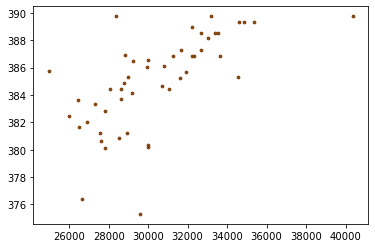

In [21]:
#scatter plot
#https://matplotlib.org/stable/tutorials/colors/colors.html <-- colors as strings
#https://www.w3schools.com/colors/colors_rgb.asp <-- more rgb
#https://wowpedia.fandom.com/wiki/Class_colors <-- class colors

plt.scatter(x, y, label= "", color= '#80420c', 
            marker= ".", s=30)
plt.show()

In [31]:
bale_assa = pd.read_pickle("Baleroc_25hc_Rog_Assassination_31052021.pkl")

In [32]:
plt.figure(dpi=2400)
#Warrior
x = bale_arms['avg_item_lvl']
y = bale_arms['dps']
plt.scatter(x, y, label= "", color= '#80420c', 
            marker= ".", s=30)

#Paladin
x = bale_ret['avg_item_lvl']
y = bale_ret['dps']
plt.scatter(x, y, label= "", color= '#ff6cab', 
            marker= ".", s=30)

#Hunter
x = bale_surv['avg_item_lvl']
y = bale_surv['dps']
plt.scatter(x, y, label= "", color= '#00aa00', 
            marker= ".", s=30)

#Rogue
x = bale_combat['avg_item_lvl']
y = bale_combat['dps']
plt.scatter(x, y, label= "", color= '#e6e200', 
            marker= ".", s=30)

#Rogue 2
x = bale_assa['avg_item_lvl']
y = bale_assa['dps']
plt.scatter(x, y, label= "", color= '#e6e200', 
            marker= ".", s=30)

#Priest
x = bale_shadow['avg_item_lvl']
y = bale_shadow['dps']
plt.scatter(x, y, label= "", color= '#969696', 
            marker= ".", s=30)

#DK
x = bale_uhdk['avg_item_lvl']
y = bale_uhdk['dps']
plt.scatter(x, y, label= "", color= '#c40000', 
            marker= ".", s=30)

#Shaman
x = bale_ele['avg_item_lvl']
y = bale_ele['dps']
plt.scatter(x, y, label= "", color= '#0070dd', 
            marker= ".", s=30)

#Mage
x = bale_fire['avg_item_lvl']
y = bale_fire['dps']
plt.scatter(x, y, label= "", color= '#3fc3eb', 
            marker= ".", s=30)

#Warlock
x = bale_demo['avg_item_lvl']
y = bale_demo['dps']
plt.scatter(x, y, label= "", color= '#501774', 
            marker= ".", s=30)

#Druid
x = bale_balance['avg_item_lvl']
y = bale_balance['dps']
plt.scatter(x, y, label= "", color= '#ff7c0a', 
            marker= ".", s=30)

#drawing the plot
plt.show()

#saving high res img
plt.savefig('bale_main_dps_specs.png')

<Figure size 432x288 with 0 Axes>

#### future ideas:

- sort for guilds?
- lme model of fight len, avg ilvl, (and guild), spec, outcome dps values?
- avg dps of each guild across and for each spec?